Матвеев С.А. прин-368
Лаба 4

1. Чистка данных:

    1.1. Заменить "Not Available" на np.nan
    
    1.2. Привести все колонки в правильный тип

In [1]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('data/Energy_and_Water_Data.csv')

# Замена значений "Not Available" на np.nan
df.replace("Not Available", np.nan, inplace=True)

# Приведение типов
# Определяем колонки, которые можно привести к числовому типу (float), если они содержат пропуски
num_cols = ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)',
            '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)',
            'Year Built', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score', 
            'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 
            'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
            'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
            'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)', 
            'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)',
            'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)',
            'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 
            'Indirect GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)',
            'Water Use (All Water Sources) (kgal)', 'Water Intensity (All Water Sources) (gal/ft²)',
            'Source EUI (kBtu/ft²)', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'Census Tract']

# Приводим перечисленные колонки к числовому типу
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Приводим типы некоторых других колонок, которые должны быть категориальными
cat_cols = ['Borough', 'Primary Property Type - Self Selected', 'Largest Property Use Type', 
            '2nd Largest Property Use Type', '3rd Largest Property Use Type', 
            'Metered Areas (Energy)', 'Metered Areas  (Water)', 'Water Required?', 'DOF Benchmarking Submission Status']

df[cat_cols] = df[cat_cols].astype('category')

# Проверка итоговых типов
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Order                                                       11746 non-null  int64   
 1   Property Id                                                 11746 non-null  int64   
 2   Property Name                                               11746 non-null  object  
 3   Parent Property Id                                          11746 non-null  object  
 4   Parent Property Name                                        11746 non-null  object  
 5   BBL - 10 digits                                             11735 non-null  object  
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object  
 7   NYC Building Identification Number (BIN)                    11584 non-null  

2. Избавиться от пропущенных данных и выбросов.
3. Построить графики зависимости переменных, найти зависимости.

C:\Users\mset6\AppData\Local\Temp\ipykernel_17220\1827330486.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Заполнение медианой
C:\Users\mset6\AppData\Local\Temp\ipykernel_17220\1827330486.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

<class 'pandas.core.frame.DataFrame'>
Index: 1354 entries, 105 to 11744
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   Order                                                       1354 non-null   int64   
 1   Property Id                                                 1354 non-null   int64   
 2   Property Name                                               1354 non-null   object  
 3   Parent Property Id                                          1354 non-null   object  
 4   Parent Property Name                                        1354 non-null   object  
 5   BBL - 10 digits                                             1354 non-null   object  
 6   NYC Borough, Block and Lot (BBL) self-reported              1354 non-null   object  
 7   NYC Building Identification Number (BIN)                    1337 non-null   obje

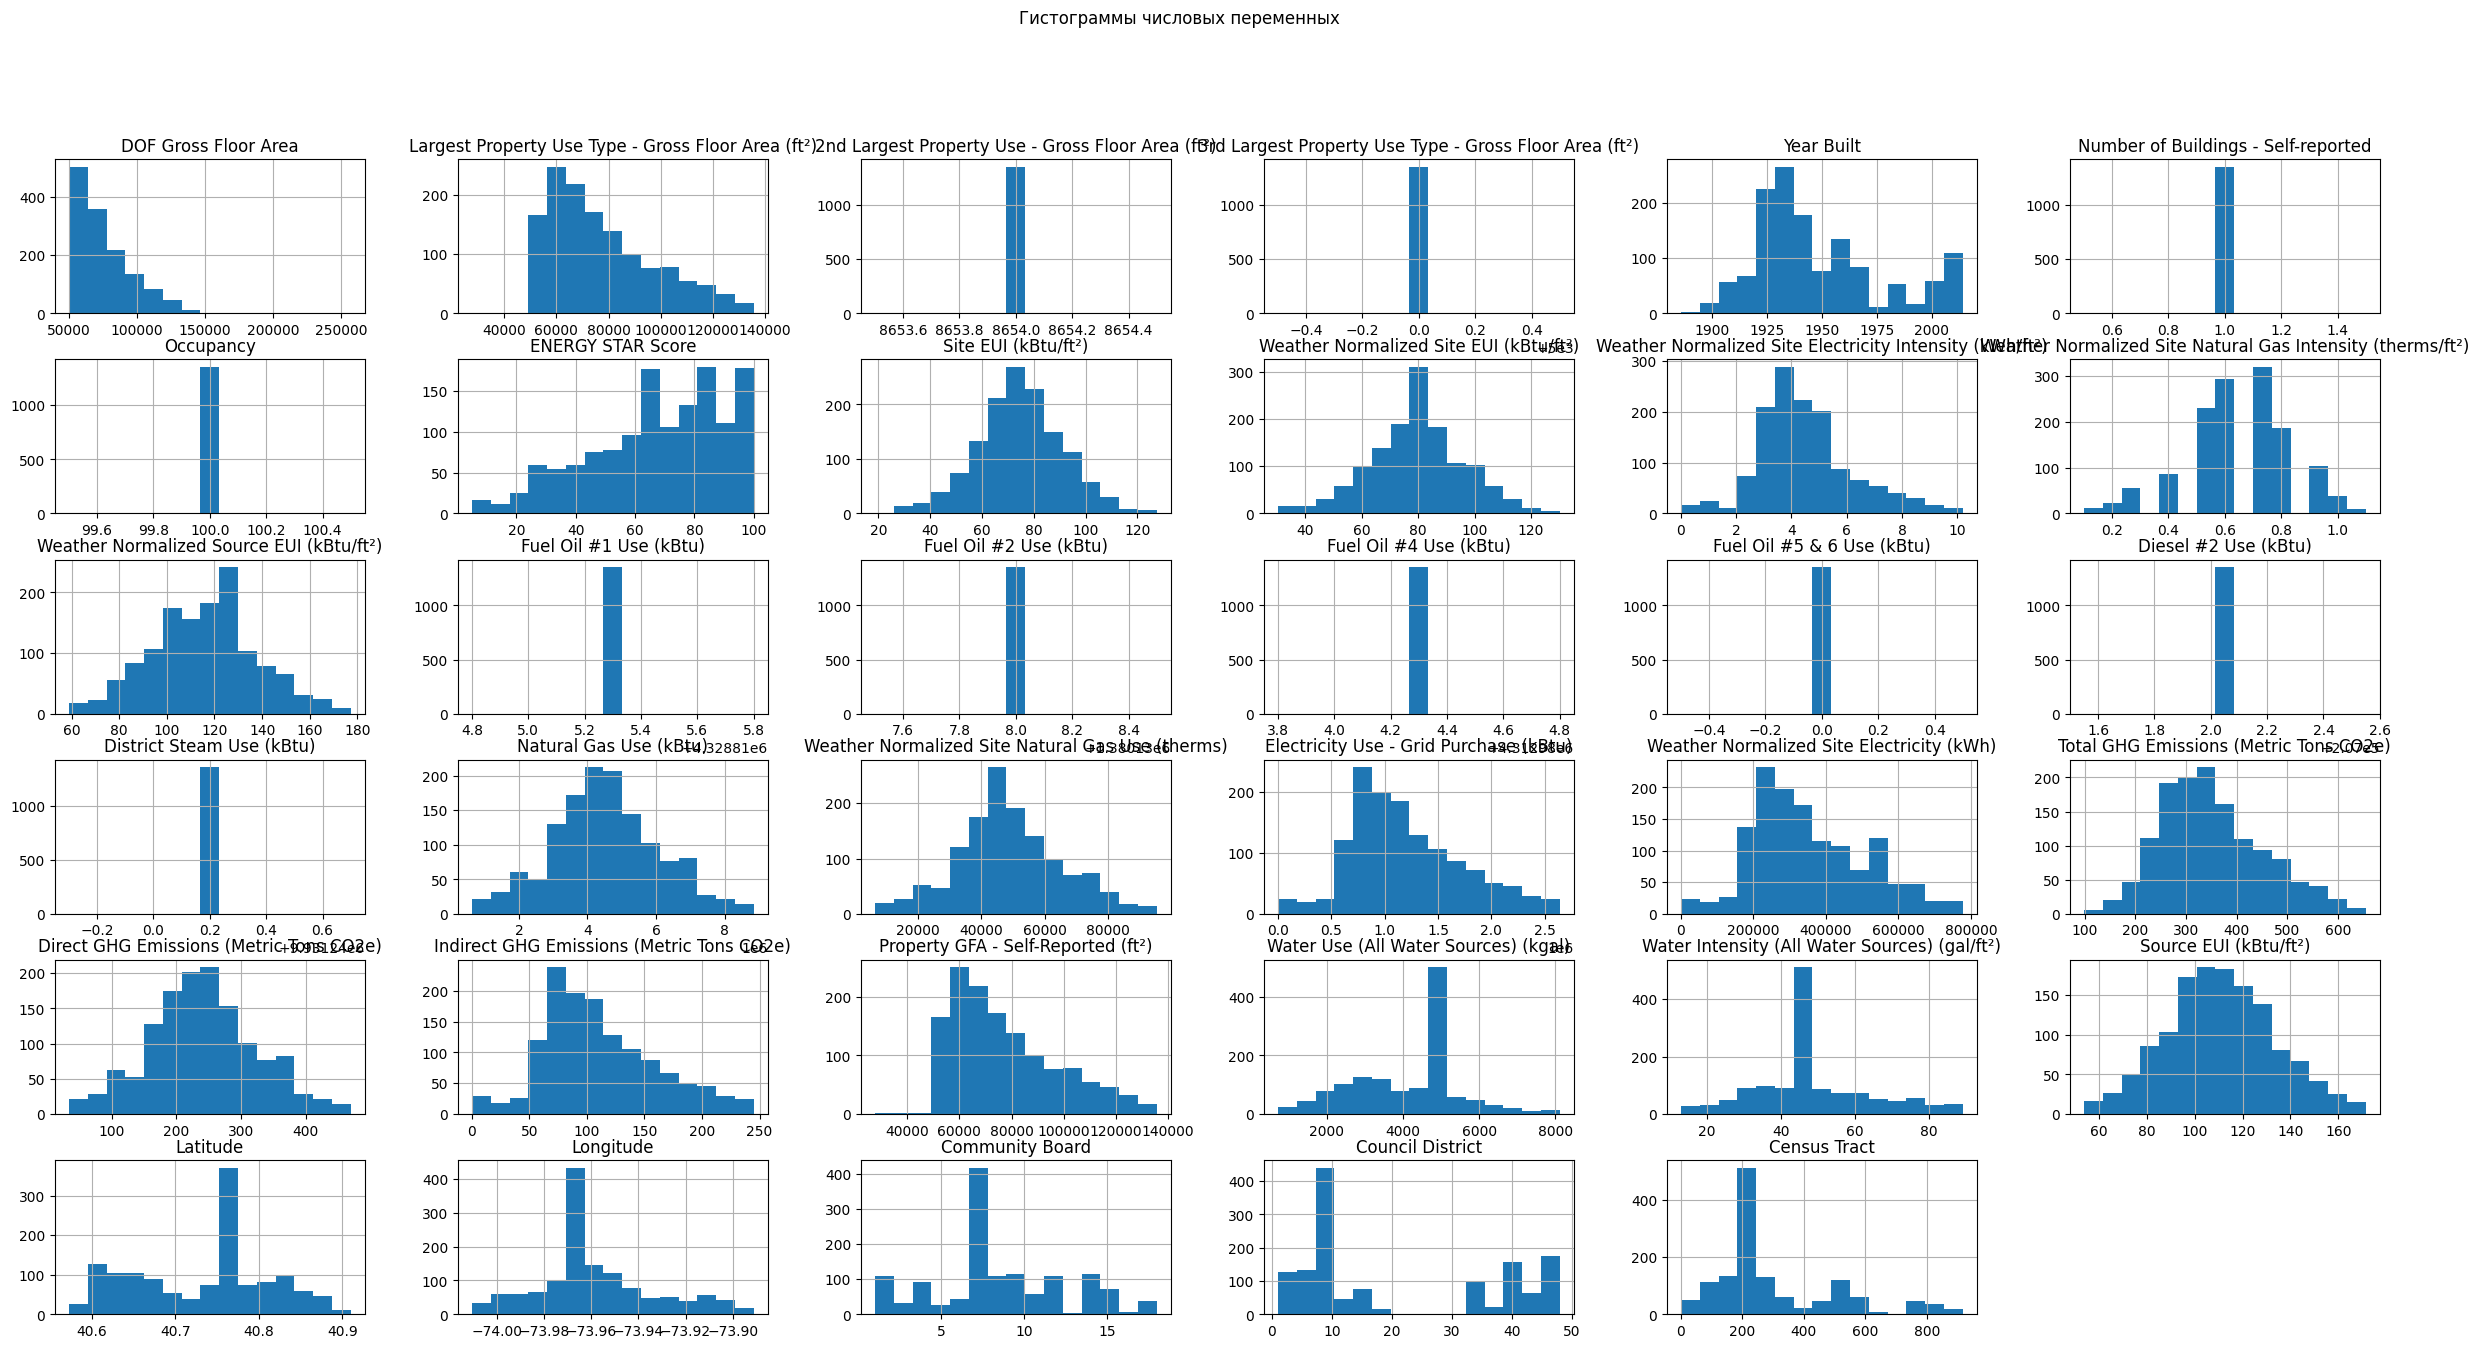

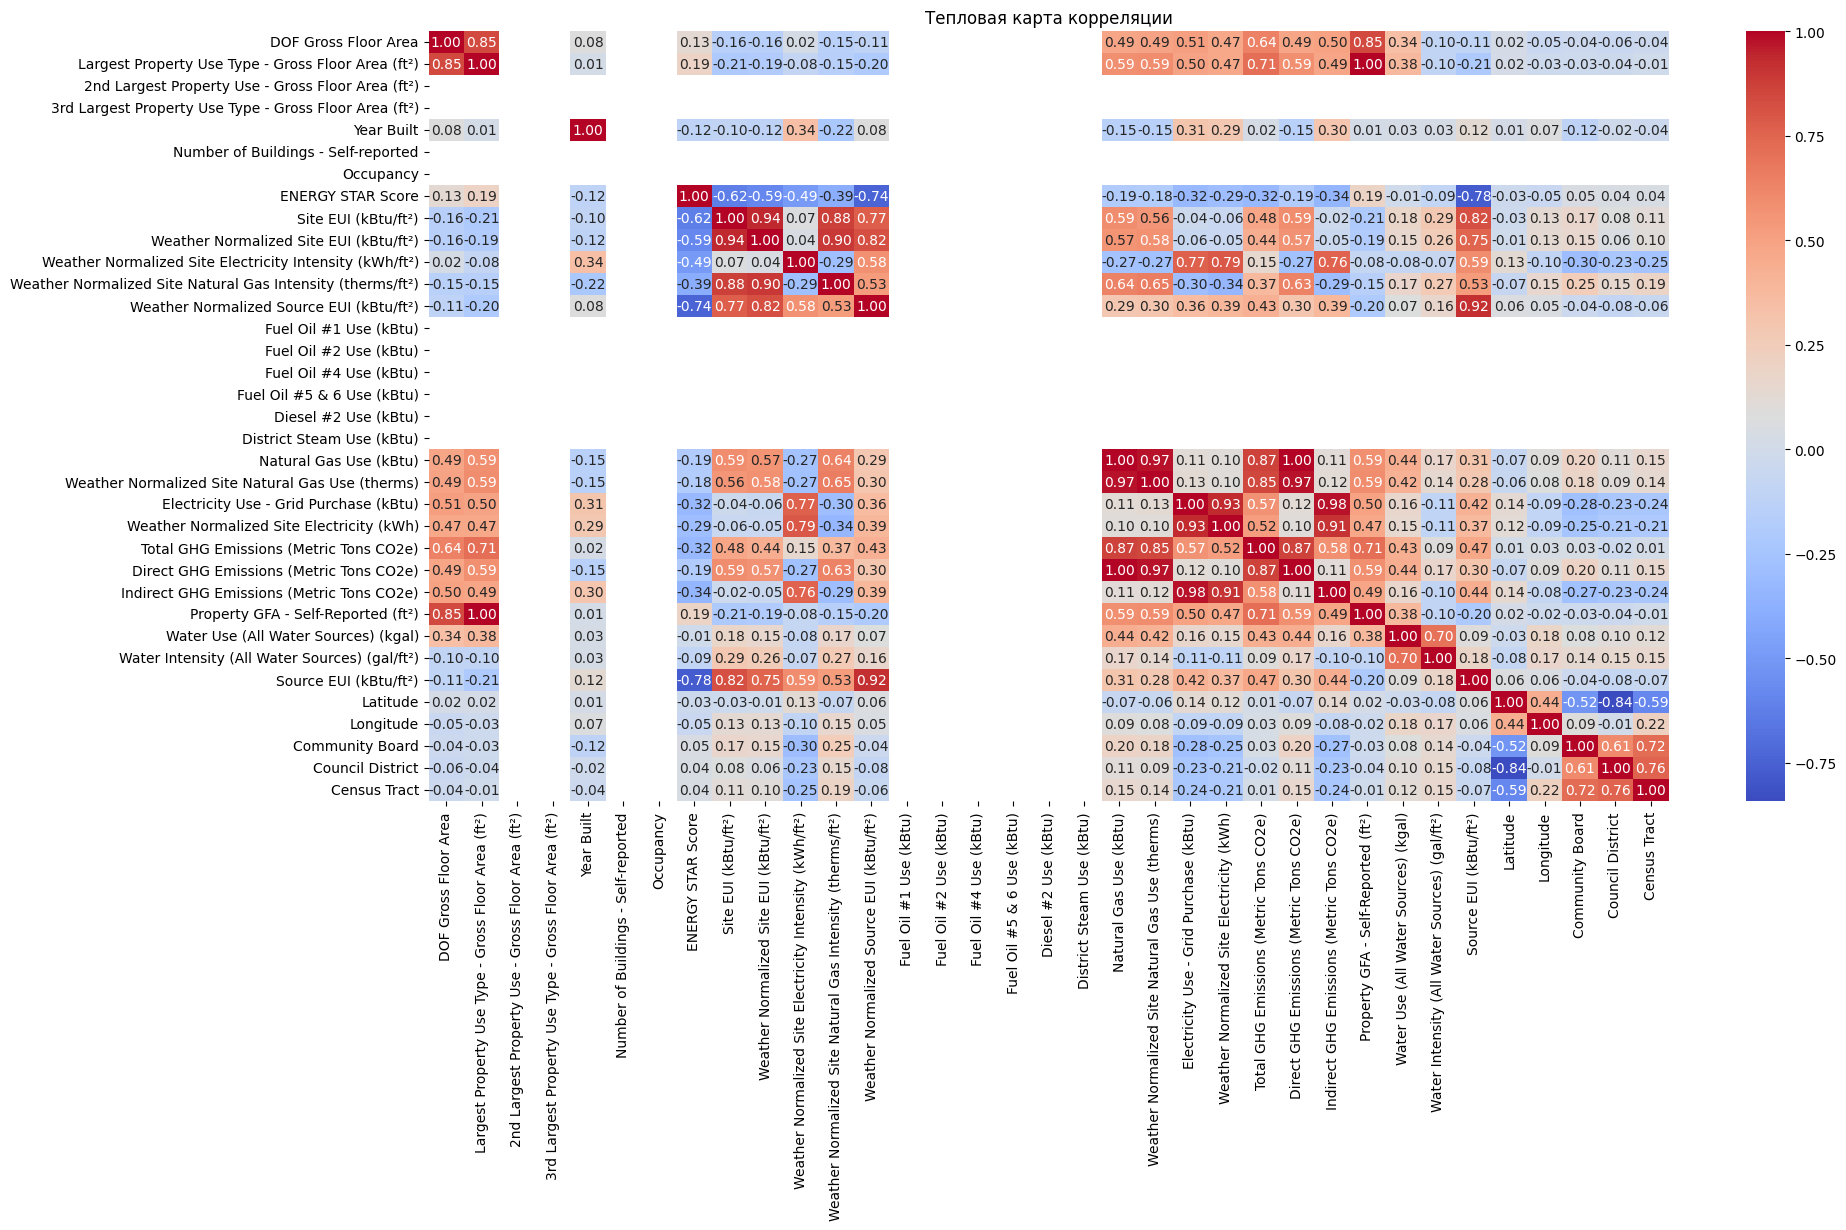

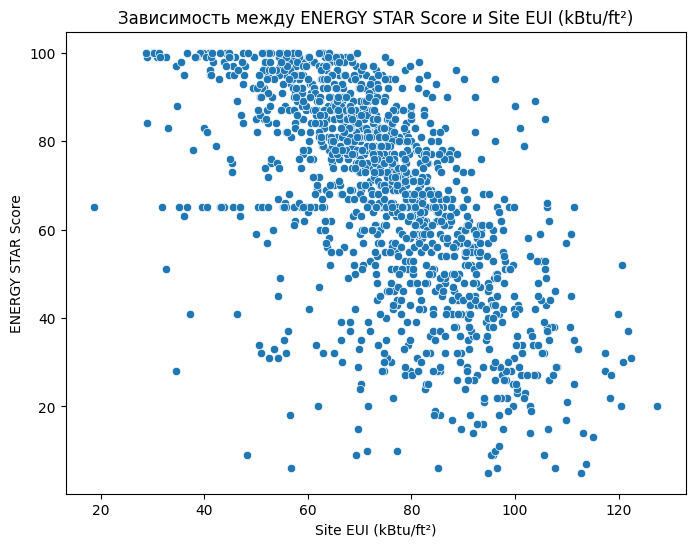

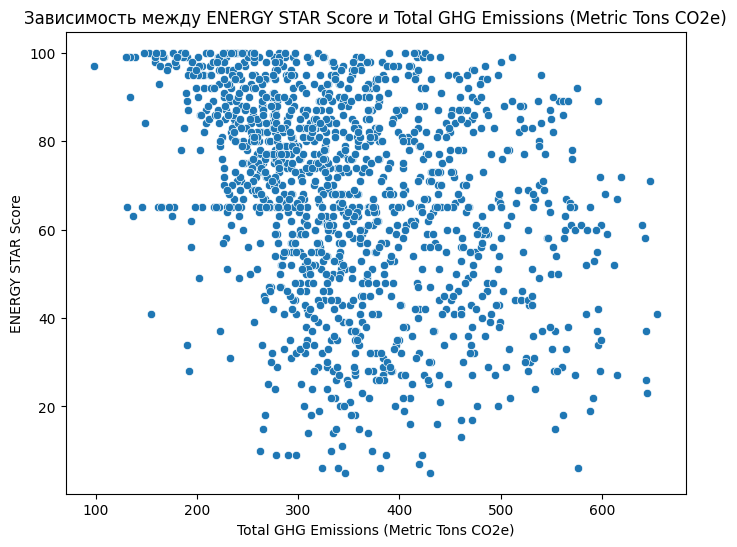

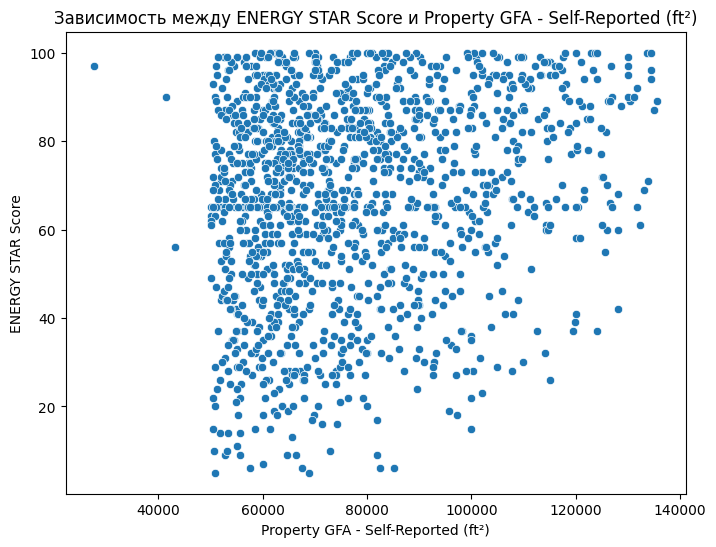

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Заполнение оставшихся пропусков средним для числовых данных и модой для категориальных
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].median(), inplace=True)  # Заполнение медианой
    elif df[col].dtype == 'category':
        df[col].fillna(df[col].mode()[0], inplace=True)  # Заполнение модой

# Удаление выбросов по методу IQR для числовых столбцов
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.info()


# Построение гистограмм для всех числовых признаков
df[num_cols].hist(bins=15, figsize=(30, 15))
plt.suptitle("Гистограммы числовых переменных")
plt.show()

# Тепловая карта корреляции
plt.figure(figsize=(20, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()

# Диаграммы рассеяния для переменных с потенциальной зависимостью
for col in ['Site EUI (kBtu/ft²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (ft²)']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='ENERGY STAR Score')
    plt.title(f'Зависимость между ENERGY STAR Score и {col}')
    plt.show()



# # Фильтрация выбросов для всех числовых столбцов
# df_filtered = df[~((df.select_dtypes(include=[np.number]) < lower_bound) | (df.select_dtypes(include=[np.number]) > upper_bound)).any(axis=1)]

# # Построение графиков зависимости переменных
# sns.pairplot(df_filtered[['Year Built', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Water Use (All Water Sources) (kgal)']])
# plt.show()



4. Создание новых признаков

    4.1. сделать все перечисляемые типы категориальныйми (pandaas.get_dummies())

    4.2. Прогнать все числовые типы через функцию логарифма

In [3]:
df = pd.get_dummies(df)
# Применение логарифмической трансформации для всех числовых переменных
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: np.log(x + 1) if (x > 0).all() else np.log1p(x))

df.info()


c:\Users\mset6\maadLab4\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 1354 entries, 105 to 11744
Columns: 9495 entries, Order to NTA_park-cemetery-etc-Brooklyn                                                 
dtypes: bool(9458), float64(37)
memory usage: 12.6 MB


5. Выбор признаков: 

    5.1. Оставить все колонки с коэфициентом кореляции 0.6 и выше

    5.2. Удалить все колонки со значением na

In [4]:

# Удаление колонок с значениями na
df.dropna(axis=1, how='any', inplace=True)

# Ограничим количество числовых признаков для корреляции (например, 20 признаков)
top_n_numeric_columns = df.select_dtypes(include=[np.number]).columns[:20]

# Вычисление матрицы корреляций только для выбранных признаков
corr_matrix = df[top_n_numeric_columns].corr()

# Фильтрация признаков с корреляцией >= 0.6
# Мы выбираем только те колонки, у которых есть хотя бы один коэффициент корреляции >= 0.6
correlated_features = corr_matrix.columns[(corr_matrix.abs() >= 0.6).any(axis=0)]

# Оставляем только эти признаки
df_filtered = df[correlated_features]


# Вывод информации о колонках
df = df_filtered
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1354 entries, 105 to 11744
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       1354 non-null   float64
 1   Property Id                                                 1354 non-null   float64
 2   DOF Gross Floor Area                                        1354 non-null   float64
 3   Largest Property Use Type - Gross Floor Area (ft²)          1354 non-null   float64
 4   Year Built                                                  1354 non-null   float64
 5   ENERGY STAR Score                                           1354 non-null   float64
 6   Site EUI (kBtu/ft²)                                         1354 non-null   float64
 7   Weather Normalized Site EUI (kBtu/ft²)                      1354 non-null   float64
 8   

6. Оценка результата.

    Выбираем метрику: среднее абсолютное отклонение (mean absolute error (MAE))

    Чтобы провести обучение нужно разделить выборку на обучающую и тестовую

    формула расчета mae = средн(модуль(y настояший - y предсказанный))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Выбор признаков и целевой переменной (например, 'ENERGY STAR Score')
X = df.drop('ENERGY STAR Score', axis=1)  # Признаки
y = df['ENERGY STAR Score']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели (например, линейной регрессии)
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Расчет MAE
mae = mean_absolute_error(y_test, y_pred)

# Вывод результата
print(f"Среднее абсолютное отклонение (MAE): {mae}")


Среднее абсолютное отклонение (MAE): 0.24068509467157184


Попробовать обучить модель на моделях из sklearn и посмотреть mae для:

    LinearRegression

    SVR

    RandomForestRegressor

    GradientBoostingRegressor

    KNeighborsRegressor


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Выбор признаков и целевой переменной
X = df.drop('ENERGY STAR Score', axis=1)
y = df['ENERGY STAR Score']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список моделей для тестирования
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "KNeighbors Regressor": KNeighborsRegressor()
}

# Словарь для хранения результатов MAE
results = {}

# Обучение и оценка каждой модели
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = mae
    print(f"{model_name} MAE: {mae}")


Linear Regression MAE: 0.24068509467157184
Support Vector Regressor MAE: 0.22785084315780202
Random Forest Regressor MAE: 0.20493069280269546
Gradient Boosting Regressor MAE: 0.2103658303660042
KNeighbors Regressor MAE: 0.21782154138385537
